# Análisis de las plataformas 2018 de los partidos políticos utilizando NLTK
#### Junio 2018
#### Sergio Castillo

## Contenido

<a href="#intro">1. Introducción</a><br>
<a href="#librerias">2. Librerías y Funciones</a><br>
<a href="#PES">3. Partido Encuentro Social</a><br>
<a href="#MC">4. Partido Movimiento Ciudadano</a><br>
<a href="#MORENA">5. MORENA</a><br>
<a href="#PNA">6. Partido Nueva Alianza</a><br>
<a href="#PAN">7. Partido Acción Nacional</a><br>
<a href="#PRD">8. Partido de la Revolución Democrática</a><br>
<a href="#PRI">9. Partido Revolucionario Institucional</a><br>
<a href="#PT">10. Partido del Trabajo</a><br>
<a href="#PVEM">11. Partido Verde Ecologista de México</a><br>
<a href="#conclusiones">12. Conclusiones</a><br>
<a href="#futuro">13. Trabajo Futuro</a><br>

<a id='intro'></a>
### 1. Introducción

El presente documento analiza de manera básica el lenguaje utilizado por cada partido político dentro de sus plataformas políticas para el año 2018. En general, el archivo se divide en 4 partes. Primero, se presentan las librerías y funciones que se implementaron en caso de que se quiera replicar o utilizar alguna función en particular. Segundo, el análisis de cada plataforma que comprende 5 puntos: 1) la frecuencia de las palabras, 2) la dispersión de las palabras más utilizadas a través del texto, 3) grupo de 2 y 3 palabras que se encuentran juntas más veces dentro de la plataforma, 4) total de palabras por tipo gramatical, y 5) un listado de palabras claves o de interés general para saber si el partido político aborda el tema dentro de la plataforma o no. La tercera parte es una breve conclusión cuantitativa sobre los resultados obtenidos en la parte 2. Y finalmente, se mencionan posibles áreas donde este proyecto pudiera seguir o profundizar.

Cabe mencionar que dentro de la segunda parte, el cuarto apartado (total de palabras por tipo gramatical) no se pudo realizar para las plataformas de los partido de Nueva Alianza, PT y PVEM, por algún motivo el proceso se queda colgado y nunca termina. Supongo que debe haber algún carácter especial o basura que no se ha podido encontrar.

Por último, este documento no intenta definir que plataforma es mejor o peor, basado en la información que aquí se presenta, se pretende ayudar al lector a que llegue a su propia conclusión.

<a id='librerias'></a>
### 2. Librerías y Funciones

**Nota Técnica**: éste "cuaderno" de jupyter esta desarrollado en python 2 y para poder correr el código, es necesario tener todas las librerías instaladas como: <br>

nltk - https://www.nltk.org/install.html<br>
matplotlib - https://matplotlib.org/users/installing.html<br>
wordcloud - https://matplotlib.org/users/installing.html<br>
StanfordPOSTagger - https://nlp.stanford.edu/software/tagger.html

Las plataformas se obtuvieron en formato PDF por medio de Codeando México (https://github.com/CodeandoMexico/HackatonElectoralMx) y se transformaron a .text utilizando http://pdftotext.com/ 

Un pequeño preproceso manual se realizó eliminando caracteres ASCII, palabras como "pagina x de y", índices, número de secciones, y citas bibliográficas.

**Fin de la Nota**

In [1]:
#abrimos y leemos el archivo de la plataforma en formato txt
#codes se utiliza para leer el texto completo
import codecs
import nltk
import matplotlib.pyplot as plt
import re, string
import nltk.corpus  
from nltk.collocations import *
from nltk.tag import StanfordPOSTagger
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.draw.dispersion import dispersion_plot
from nltk.text import Text
from nltk import word_tokenize

#Después de descargar StanfordPOSTagger se tiene que indicar donde esta el archivo .jar y .tagger en español para que funcione
tagger = "../../stanford-postagger/models/spanish.tagger"
jar = "../../stanford-postagger/stanford-postagger.jar"

In [2]:
#Funciones utilizadas
#--------------------#
def abrirTexto(nombreArchivo):
    #abrimos el archivo, se asigna a la variable text y se cierra
    f=codecs.open (nombreArchivo, encoding='utf-8')
    text = f.read()
    f.close()
    return text

def todoMinusculas(text):
    #todo a minúsculas
    text = text.lower() 
    return text

def eliminacionSignos(text):
    #Eliminamos los signos de puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

def tokenizar(text):
    #Convertir texto en arreglo de palabras 
    palabras = word_tokenize(text)
    return palabras

def palabrasUtiles(palabras):
    #arreglo que contiene las palabras relevantes
    palabras_no_vacias = []
    for palabra in palabras:
        if palabra not in stopwords.words('spanish'):
            palabras_no_vacias.append(palabra.replace(string.punctuation, '')) 
    return palabras_no_vacias

def crearNube(palabrasRelevantes):
    str1 = ''.join(palabrasRelevantes)
    wordcloud = WordCloud(max_words=20, width=540, height=540, margin=2, 
                        stopwords=stopwords.words('spanish'), 
                        colormap="ocean", mode="RGBA").generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
    return

def dispersionPalabras(palabrasRelevantes):
    top20_words = []
    for word in top20:
        top20_words.append(word[0])
    plt.figure(figsize=(10, 6))
    dispersion_plot(palabrasRelevantes, top20_words)
    return

def bigram(palabrasRelevantes):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(palabrasRelevantes)
    finder.apply_freq_filter(3)
    print ('Top de 2 palabras que aparecen juntas mas veces: ')
    print repr(finder.nbest(bigram_measures.pmi, 10)).decode('unicode-escape')
    return

def trigram(palabrasRelevantes):
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_words(palabrasRelevantes)
    finder.apply_freq_filter(3)
    print ('Top de 3 palabras que aparecen juntas mas veces: ')
    print repr(finder.nbest(trigram_measures.pmi, 10)).decode('unicode-escape')
    return

def palabrasPorTipoGramatical(palabrasRelevantes):
    etiquetador=StanfordPOSTagger(tagger,jar)
    etiquetas=etiquetador.tag(palabrasRelevantes)
    tagDic = {}
    for etiqueta in etiquetas:
        if etiqueta[1] in tagDic:
            tagDic[etiqueta[1]] +=1
        else:
            tagDic[etiqueta[1]] = 1
    filterDic = {k: v for k, v in tagDic.iteritems() if v > 10}
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(range(len(filterDic)), filterDic.values(), align='center',
        color='green', ecolor='black')
    ax.set_yticks(range(len(filterDic)))
    ax.set_yticklabels(filterDic.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Total de Palabras')
    ax.set_title('Numero de palabras por tipo gramatical')
    plt.show()
    return

def palabrasEnPlataforma(palabras):
    for palabra in palabras:
        print '--',palabra,'--'
        textList.concordance(palabra)
    return

<a id='PES'></a>
### 3. PARTIDO ENCUENTRO SOCIAL

#### 3.1 Abrir Archivo

In [3]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaES.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 3.2 Preprocesamiento

In [4]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 3.3 Frecuencia de Palabras

In [5]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 7518
Palabras útiles totales en la plataforma: 4026
En total hay 1775 palabras únicas
Estas palabras se usan 4026 veces, aproximadamente 2.27 en promedio (suponiendo que se usaran igual)


In [6]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 1068 palabras que se usan sólo una vez de las palabras únicas, un 60.17%


In [7]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'desarrollo', 47), (u'social', 34), (u'mujeres', 24), (u'recursos', 24), (u'programas', 23), (u'méxico', 21), (u'promover', 20), (u'educación', 20), (u'acciones', 19), (u'política', 17), (u'mayor', 17), (u'medio', 17), (u'población', 17), (u'naturales', 17), (u'familia', 17), (u'pobreza', 16), (u'nivel', 16), (u'sociales', 16), (u'participación', 15), (u'ambiente', 15)]


In [8]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 776.0


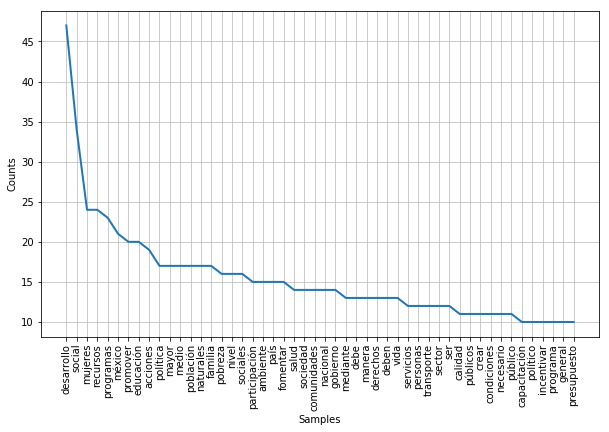

In [9]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [10]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 19.27% del total de las palabras.


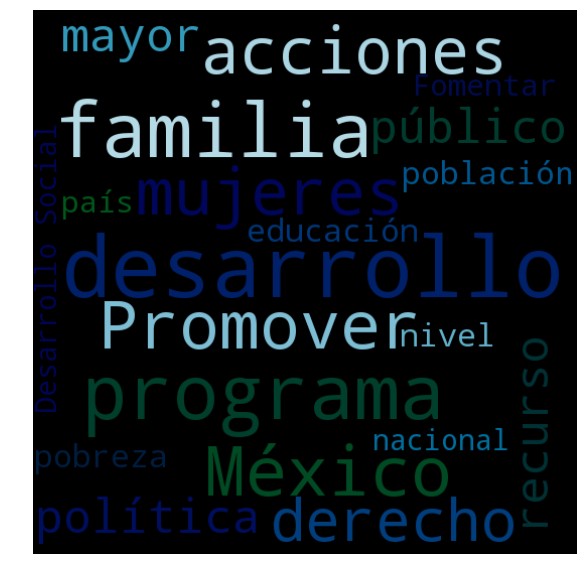

In [11]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 3.4 Dispersión de Palabras

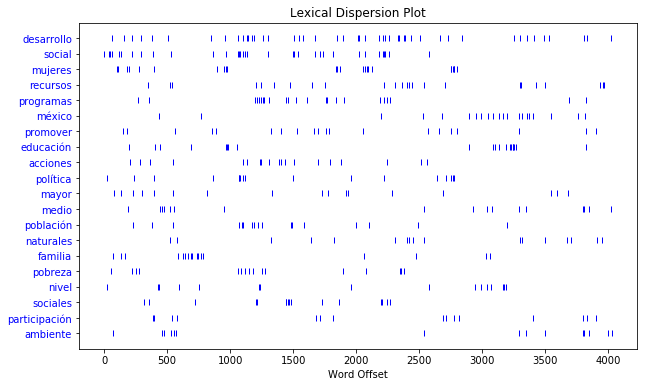

In [12]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 3.5 Bigrams y Trigrams

In [13]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'combustibles', u'fósiles'), (u'efecto', u'invernadero'), (u'estaciones', u'automáticas'), (u'gases', u'efecto'), (u'hábito', u'lectura'), (u'periodo', u'gestante'), (u'partidos', u'políticos'), (u'medios', u'comunicación'), (u'últimos', u'años'), (u'proyectos', u'productivos')]


In [14]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'gases', u'efecto', u'invernadero'), (u'leyes', u'electorales', u'estatales'), (u'tres', u'órdenes', u'gobierno'), (u'educación', u'perinatal', u'hombres'), (u'perinatal', u'hombres', u'mujeres'), (u'mujeres', u'proceso', u'lactancia'), (u'programa', u'educación', u'perinatal'), (u'nivel', u'medio', u'superior'), (u'partido', u'encuentro', u'social'), (u'desarrollo', u'liderazgo', u'político')]


#### 3.6 Palabras por Tipo Gramatical

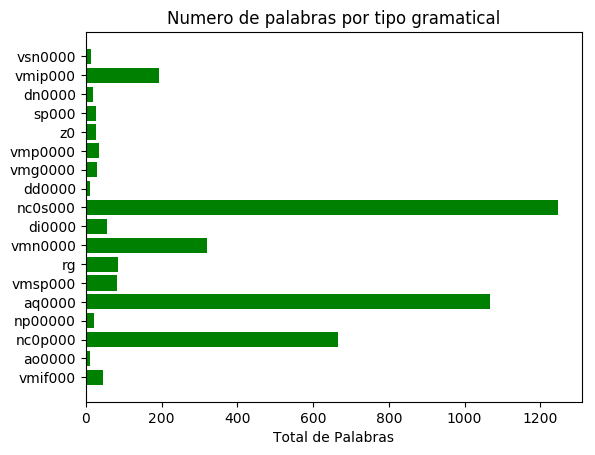

In [15]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 3.7 Palabras Claves

In [16]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
No matches
-- tecnología --
Displaying 2 of 2 matches:
rícola sobre todo infraestructura tecnología e investigación ampliar la capaci
el acceso a la investigación y la tecnología relativas a la energía limpia inc
-- innovación --
Displaying 1 of 1 matches:
cuentas participación ciudadana e innovación tecnológica esto permitiría logra
-- tecnológica --
Displaying 1 of 1 matches:
ticipación ciudadana e innovación tecnológica esto permitiría lograr resultados
-- investigación --
Displaying 2 of 2 matches:
odo infraestructura tecnología e investigación ampliar la capacidad productiva 
al para facilitar el acceso a la investigación y la tecnología relativas a la e
-- academia --
No matches
-- economía --
Displaying 2 of 2 matches:
rán de manera efectiva para que la economía de sus estados y el país en genera
rurales dada su contribución en la economía de las familias y las comunidades 
-- internet --
No matches
-- inteligencia --
No matches
-- artificial --
No matches
-- tecno

<a id='MC'></a>
### 4. PARTIDO MOVIMIENTO CIUDADANO

#### 4.1 Abrir Archivo

In [17]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaMC.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 4.2 Preprocesamiento

In [18]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 4.3 Frecuencia de Palabras

In [19]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 19684
Palabras útiles totales en la plataforma: 10681
En total hay 2961 palabras únicas
Estas palabras se usan 10681 veces, aproximadamente 3.61 en promedio (suponiendo que se usaran igual)


In [20]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 1582 palabras que se usan sólo una vez de las palabras únicas, un 53.43%


In [21]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'desarrollo', 156), (u'promover', 98), (u'personas', 82), (u'programas', 81), (u'impulsar', 77), (u'política', 76), (u'establecer', 76), (u'seguridad', 74), (u'nacional', 74), (u'políticas', 65), (u'garantizar', 64), (u'derechos', 63), (u'social', 60), (u'fortalecer', 60), (u'participación', 59), (u'públicos', 58), (u'país', 58), (u'recursos', 51), (u'ciudadana', 48), (u'gobierno', 46)]


In [22]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 2382.0


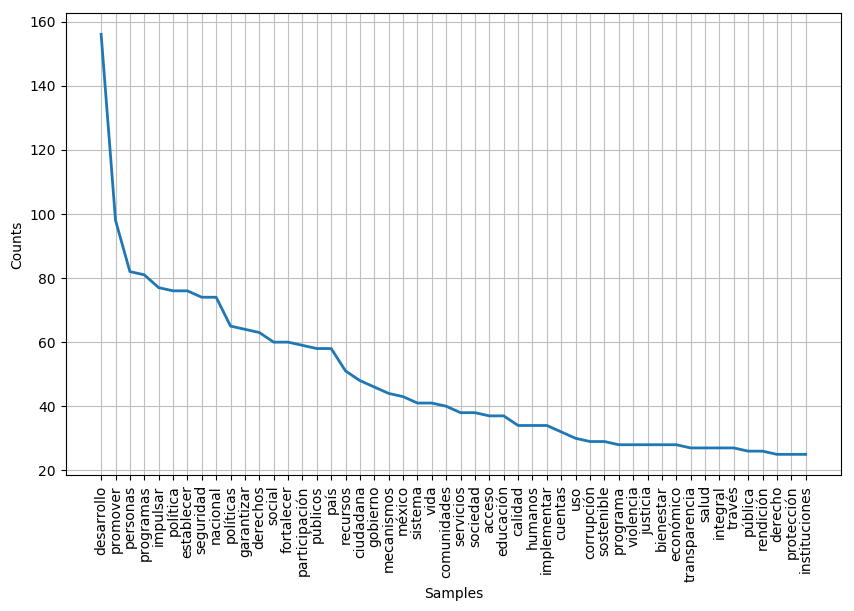

In [23]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [24]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 22.3% del total de las palabras.


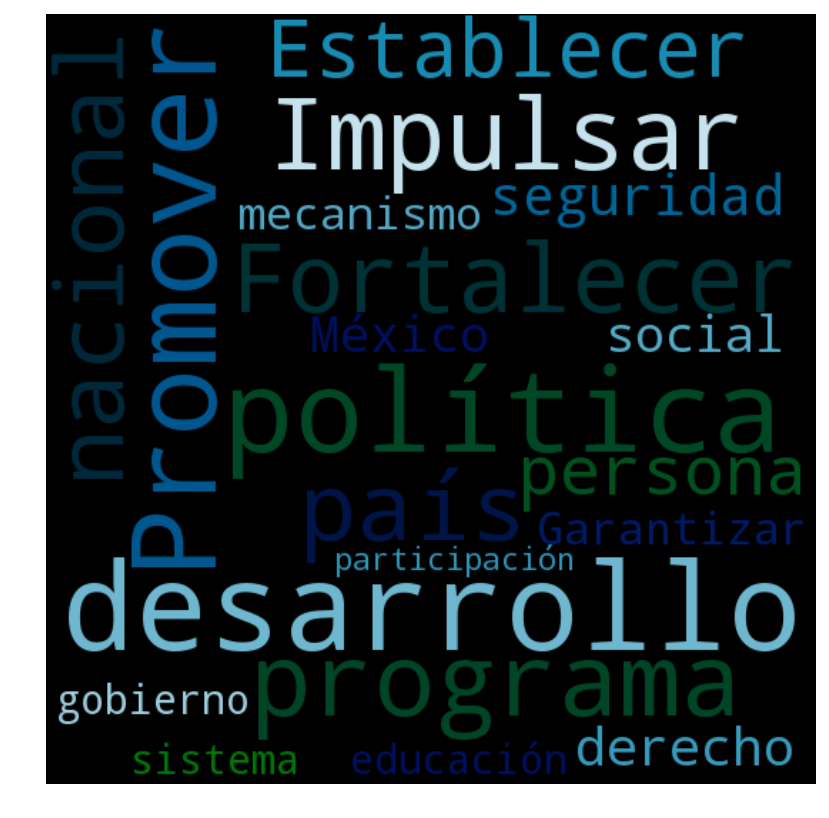

In [25]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 4.4 Dispersión de Palabras

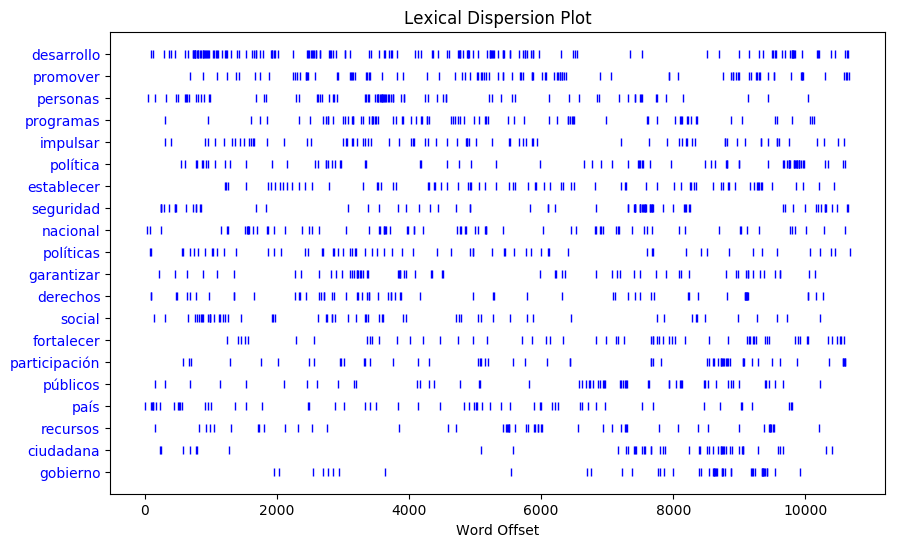

In [26]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 4.5 Bigrams y Trigrams

In [27]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'contamina', u'paga'), (u'apartidista', u'capaz'), (u'autónoma', u'apartidista'), (u'capaz', u'independiente'), (u'causas', u'estructurales'), (u'desempeñar', u'adecuadamente'), (u'simplificación', u'administrativa'), (u'adecuadamente', u'funciones'), (u'américa', u'norte'), (u'naciones', u'unidas')]


In [28]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'apartidista', u'capaz', u'independiente'), (u'autónoma', u'apartidista', u'capaz'), (u'desempeñar', u'adecuadamente', u'funciones'), (u'efectivos', u'desempeñar', u'adecuadamente'), (u'controles', u'efectivos', u'desempeñar'), (u'organización', u'naciones', u'unidas'), (u'herramientas', u'controles', u'efectivos'), (u'indígenas', u'pueblos', u'originarios'), (u'mejores', u'herramientas', u'controles'), (u'municipal', u'estatal', u'federal')]


#### 4.6 Palabras por Tipo Gramatical

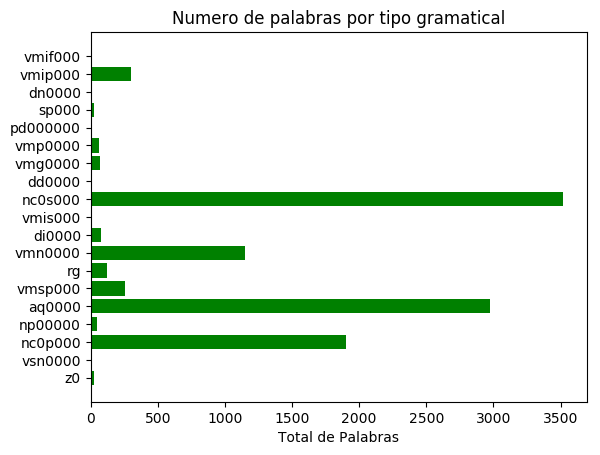

In [29]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 4.7 Palabras Claves

In [30]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 3 of 3 matches:
r las competencias y habilidades en ciencia y tecnología que proporcionan las e
lítica integral y de largo plazo de ciencia y tecnología que contribuya al desa
oyectos de cooperación en educación ciencia y tecnología integración de empresa
-- tecnología --
Displaying 6 of 6 matches:
iantes con talento en matemáticas tecnología y ciencias exactas implantar plan
encias y habilidades en ciencia y tecnología que proporcionan las escuelas del
ral y de largo plazo de ciencia y tecnología que contribuya al desarrollo naci
internet implementar el uso de la tecnología y los medios digitales para el de
pacitación permanente y el uso de tecnología e inteligencia mejorar los mecani
ooperación en educación ciencia y tecnología integración de empresas y un meca
-- innovación --
Displaying 9 of 9 matches:
 riesgos en el que el cambio y la innovación parecen ser la constante méxico n
ia para el impulso decidido de la innovación y el desarrollo científicotecnoló

<a id='MORENA'></a>
### 5. MORENA

#### 5.1 Abrir Archivo

In [31]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaMORENA.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 5.2 Preprocesamiento

In [32]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 5.3 Frecuencia de Palabras

In [33]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 7610
Palabras útiles totales en la plataforma: 4023
En total hay 2019 palabras únicas
Estas palabras se usan 4023 veces, aproximadamente 1.99 en promedio (suponiendo que se usaran igual)


In [34]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 1336 palabras que se usan sólo una vez de las palabras únicas, un 66.17%


In [35]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'méxico', 48), (u'país', 32), (u'ciento', 27), (u'millones', 27), (u'corrupción', 26), (u'nacional', 23), (u'proyectos', 22), (u'gobierno', 21), (u'mil', 20), (u'nación', 19), (u'proyecto', 19), (u'desarrollo', 18), (u'recursos', 17), (u'ser', 16), (u'educación', 16), (u'pobreza', 15), (u'social', 15), (u'propuestas', 14), (u'términos', 14), (u'seguridad', 14)]


In [36]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 734.0


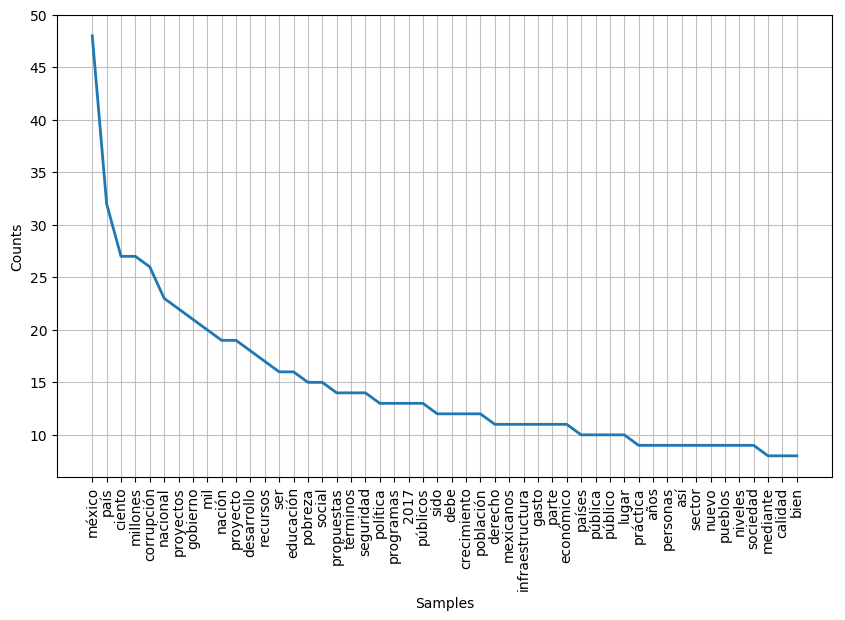

In [37]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [38]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 18.25% del total de las palabras.


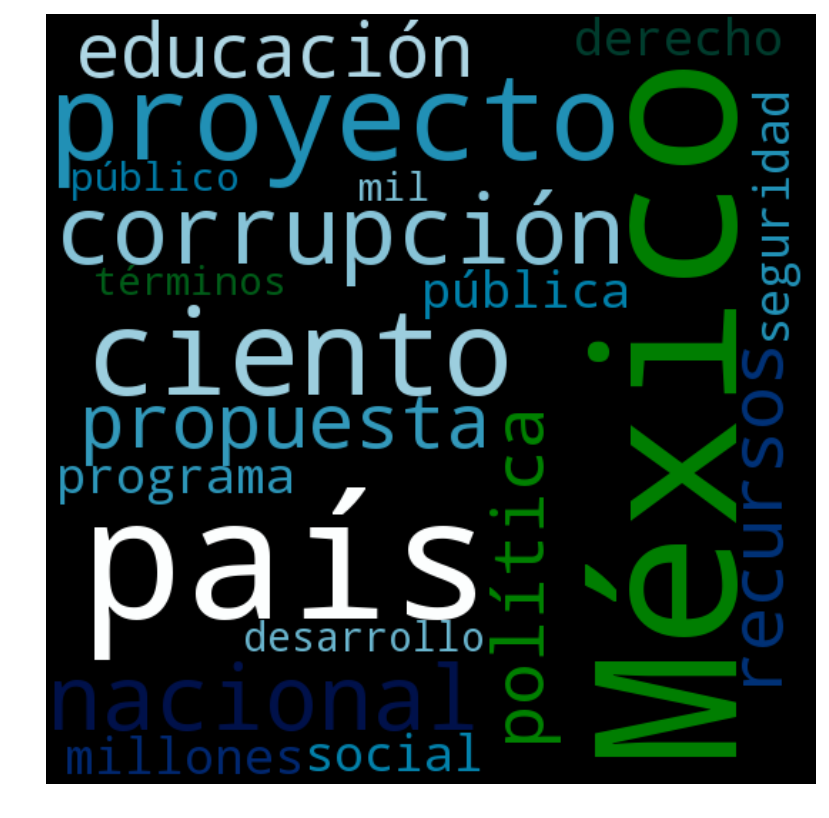

In [39]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 5.4 Dispersión de Palabras

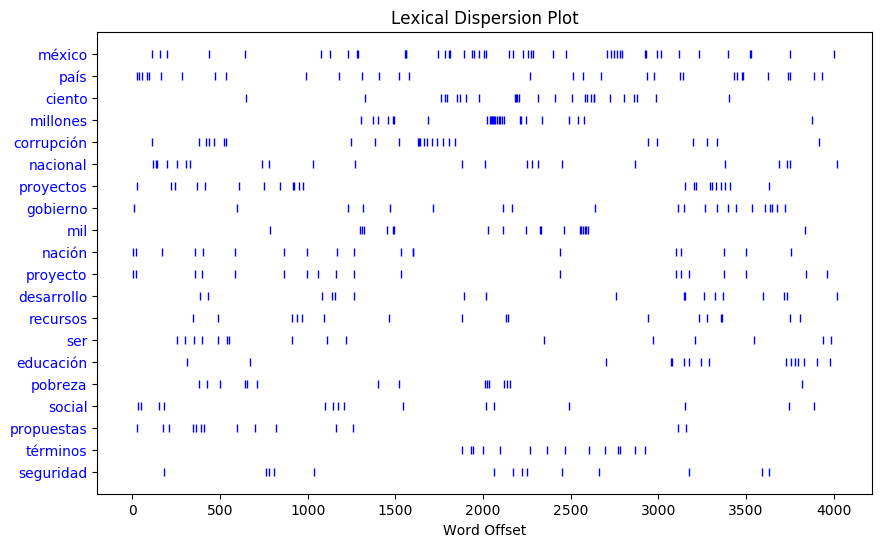

In [40]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 5.5 Bigrams y Trigrams

In [41]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'estatal', u'municipal'), (u'llevar', u'cabo'), (u'viabilidad', u'financiera'), (u'world', u'economic'), (u'marco', u'legal'), (u'tenencia', u'tierra'), (u'medio', u'ambiente'), (u'per', u'cápita'), (u'adultos', u'mayores'), (u'plataforma', u'electoral')]


In [42]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'pib', u'per', u'cápita'), (u'nuevo', u'gobierno', u'democrático'), (u'méxico', u'bueno', u'contar'), (u'proyecto', u'nación', u'20182024'), (u'mil', u'millones', u'pesos')]


#### 5.6 Palabras por Tipo Gramatical

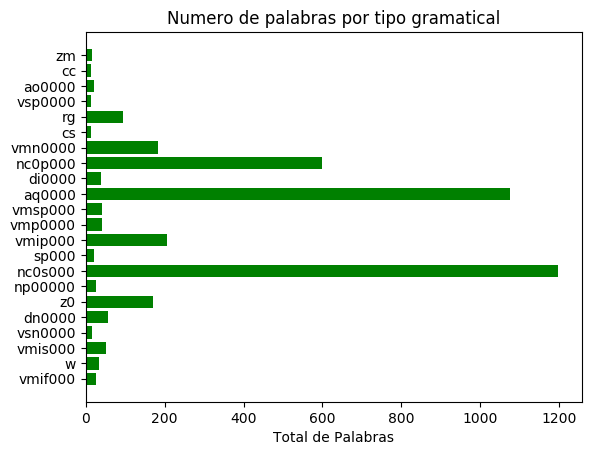

In [43]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 5.7 Palabras Claves

In [44]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
No matches
-- tecnología --
Displaying 1 of 1 matches:
 corrupción política industrial y tecnología energía sector financiero etcéter
-- innovación --
No matches
-- tecnológica --
No matches
-- investigación --
No matches
-- academia --
No matches
-- economía --
Displaying 7 of 7 matches:
eben ser empleados en reactivar la economía ensanchar la infraestructura gener
o muy grande para la sociedad y la economía el world economic forum lo estima 
istas comentan que el tamaño de la economía mexicana ha crecido 78 por ciento 
romedio anual de crecimiento de la economía ha sido de 26 por ciento una propo
plican el estancamiento de nuestra economía corrupción desvío de recursos públ
bre asuntos de política y gobierno economía y desarrollo educación cultura y v
la vulnerabilidad que ha tenido la economía mexicana ante cambios geopolíticos
-- internet --
No matches
-- inteligencia --
No matches
-- artificial --
No matches
-- tecnologías de la información --
No matches
-- software 

<a id='PNA'></a>
### 6. PARTIDO NUEVA ALIANZA

#### 6.1 Abrir Archivo

In [45]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaNA.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 6.2 Preprocesamiento

In [46]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 6.3 Frecuencia de Palabras

In [47]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 39716
Palabras útiles totales en la plataforma: 21237
En total hay 4507 palabras únicas
Estas palabras se usan 21237 veces, aproximadamente 4.71 en promedio (suponiendo que se usaran igual)


In [48]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 2185 palabras que se usan sólo una vez de las palabras únicas, un 48.48%


In [49]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'promover', 275), (u'desarrollo', 211), (u'programas', 178), (u'impulsar', 133), (u'méxico', 128), (u'social', 113), (u'recursos', 103), (u'país', 100), (u'derechos', 99), (u'educación', 99), (u'fomentar', 99), (u'así', 96), (u'gobierno', 95), (u'pública', 94), (u'fortalecer', 94), (u'visión', 89), (u'políticas', 87), (u'acceso', 83), (u'compromisos', 82), (u'sistema', 82)]


In [50]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 4146.0


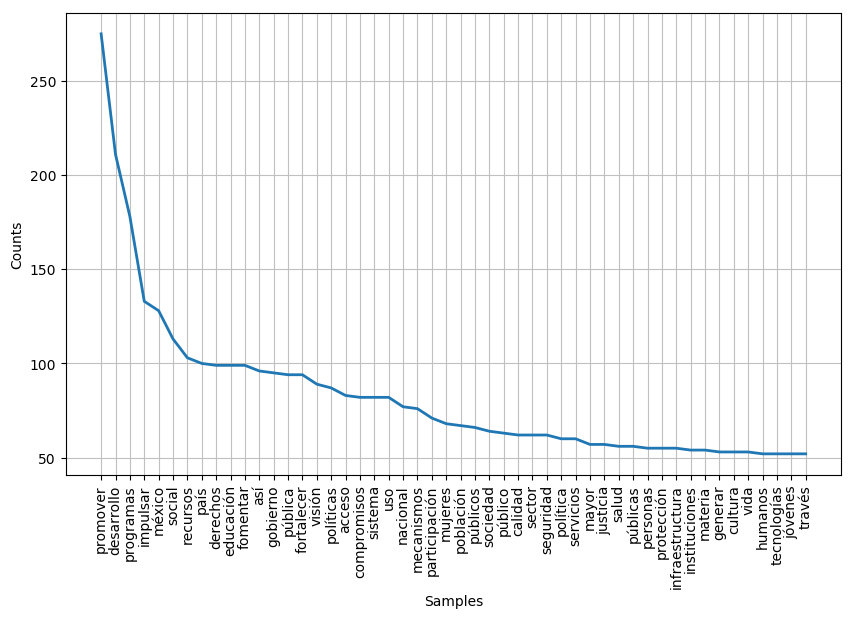

In [51]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [52]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 19.52% del total de las palabras.


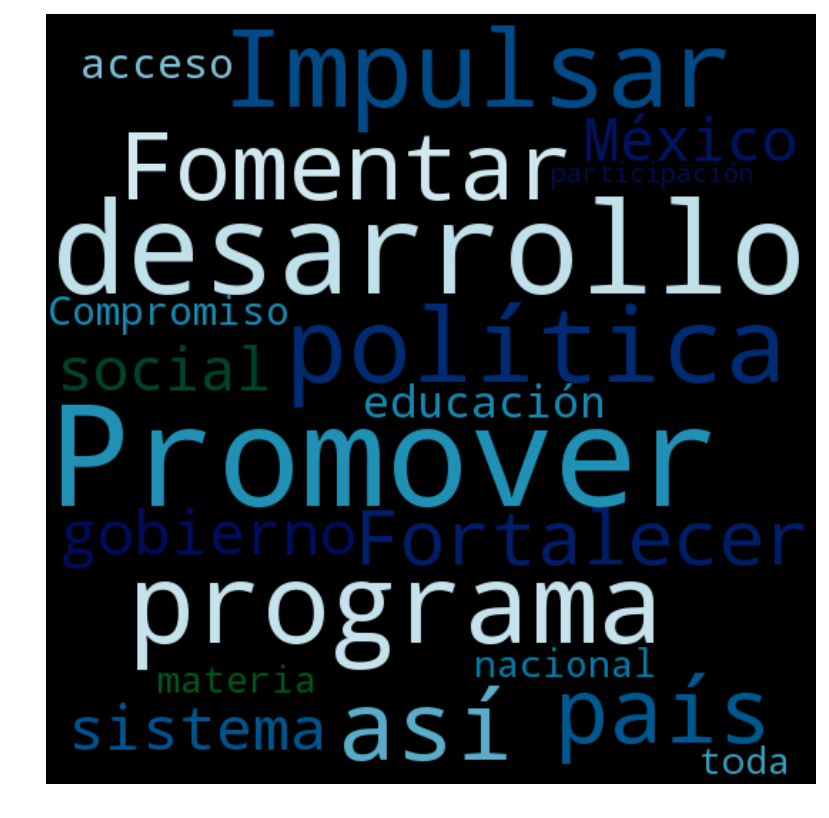

In [53]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 6.4 Dispersión de Palabras

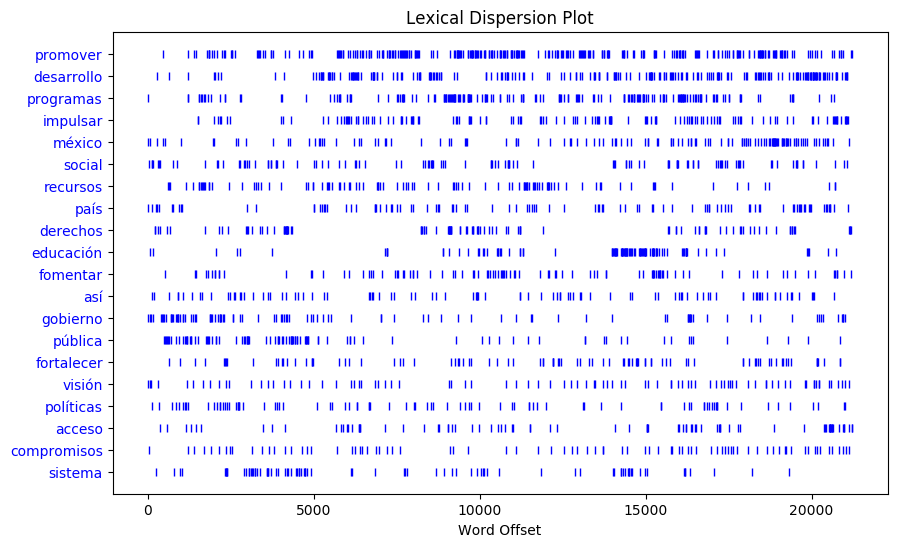

In [54]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 6.5 Bigrams y Trigrams

In [55]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'siglo', u'xxi'), (u'últimas', u'décadas'), (u'latina', u'caribe'), (u'asociaciones', u'públicoprivadas'), (u'bosques', u'selvas'), (u'eje', u'central'), (u'favorecidos', u'voto'), (u'micro', u'pequeñas'), (u'pequeñas', u'medianas'), (u'vital', u'líquido')]


In [56]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'micro', u'pequeñas', u'medianas'), (u'américa', u'latina', u'caribe'), (u'favorecidos', u'voto', u'popular'), (u'mediano', u'largo', u'plazo'), (u'intérpretes', u'lengua', u'señas'), (u'lengua', u'señas', u'mexicana'), (u'pequeñas', u'medianas', u'empresas'), (u'efectos', u'cambio', u'climático'), (u'alto', u'valor', u'agregado'), (u'tratamiento', u'aguas', u'residuales')]


#### 6.6 Palabras por Tipo Gramatical

In [57]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
#palabrasPorTipoGramatical(palabrasRelevantes)

#### 6.7 Palabras Claves

In [58]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 8 of 8 matches:
s programas educativos enfocados en ciencia y tecnología consolidados y con cob
n país que propicia la inversión en ciencia y tecnología aumenta la producción 
ndo el aumento del presupuesto para ciencia y tecnología con el objetivo de alc
a que las empresas inviertan más en ciencia y tecnología y produzcan bienes que
energético impulsar la inversión en ciencia tecnología e innovación tanto en el
ón de proyectos de investigación en ciencia básica y aplicada diseñar estrategi
el reparto presupuestal destinado a ciencia y tecnología entre las universidade
es innovadores y divulgadores de la ciencia y la tecnología en el seno de las i
-- tecnología --
Displaying 23 of 23 matches:
ra adecuada personal suficiente y tecnología de punta implementada poder judic
on infraestructura equipamiento y tecnología los sistemas de justicia del fuer
ocumental impulsando el uso de la tecnología con el fin de evitar la improvisa
nces científicos y se hace uso de te

-- software --
No matches
-- industria --
Displaying 13 of 13 matches:
ograr la sustentabilidad del midmo industria nacional fortalecida a través de p
 de fomento a la pequeña y mediana industria aprovechar la inversión pública co
dios lo que le permite vincular la industria energética con las empresas mexica
mas no inhiban el desarrollo de la industria promover la generación de incentiv
a nacional y el establecimiento de industria bioenergética para la generación d
sporte la generación de energía la industria el cambio de uso de suelo la defor
ara que las empresas turísticas la industria las clínicas y hospitales y el com
la inversión en infraestructura la industria automotriz y tecnologías limpias c
oductividad y competitividad de la industria mexicana compromisos promover herr
orar el desarrollo económico de la industria fomentar la creación desarrollo vi
 se realiza en méxico impulsar una industria generadora de contenidos en españo
ón fomentar la participación de la industria y de

<a id='PAN'></a>
### 7. PARTIDO ACCIÓN NACIONAL

#### 7.1 Abrir Archivo

In [59]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaPAN.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 7.2 Preprocesamiento

In [60]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 7.3 Frecuencia de Palabras

In [61]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 16145
Palabras útiles totales en la plataforma: 8557
En total hay 2872 palabras únicas
Estas palabras se usan 8557 veces, aproximadamente 2.98 en promedio (suponiendo que se usaran igual)


In [62]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 1654 palabras que se usan sólo una vez de las palabras únicas, un 57.59%


In [63]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'nacional', 85), (u'desarrollo', 82), (u'país', 75), (u'política', 64), (u'establecer', 54), (u'sistema', 53), (u'méxico', 50), (u'fortalecer', 48), (u'promover', 46), (u'gobierno', 45), (u'calidad', 44), (u'derechos', 41), (u'seguridad', 41), (u'políticas', 40), (u'salud', 40), (u'personas', 38), (u'social', 38), (u'vida', 37), (u'corrupción', 35), (u'públicos', 35)]


In [64]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 1724.0


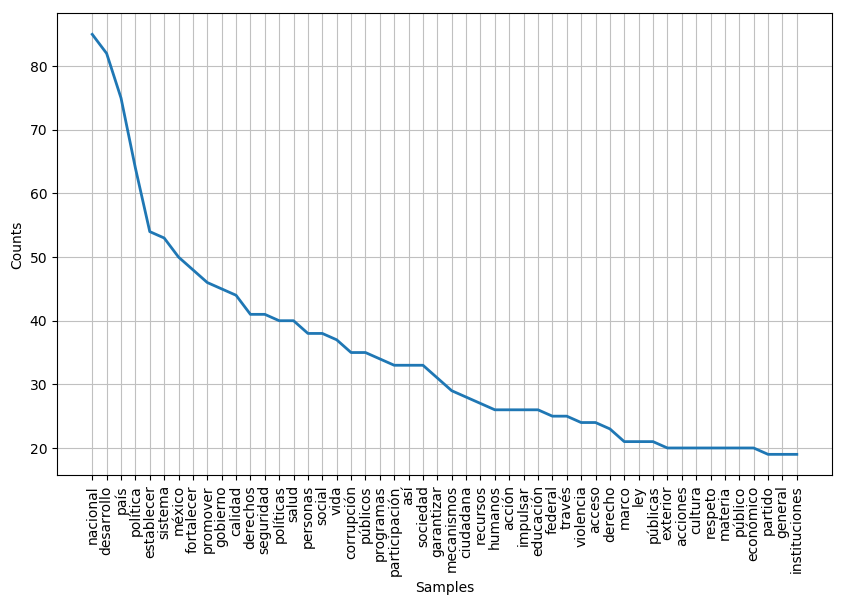

In [65]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [66]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 20.15% del total de las palabras.


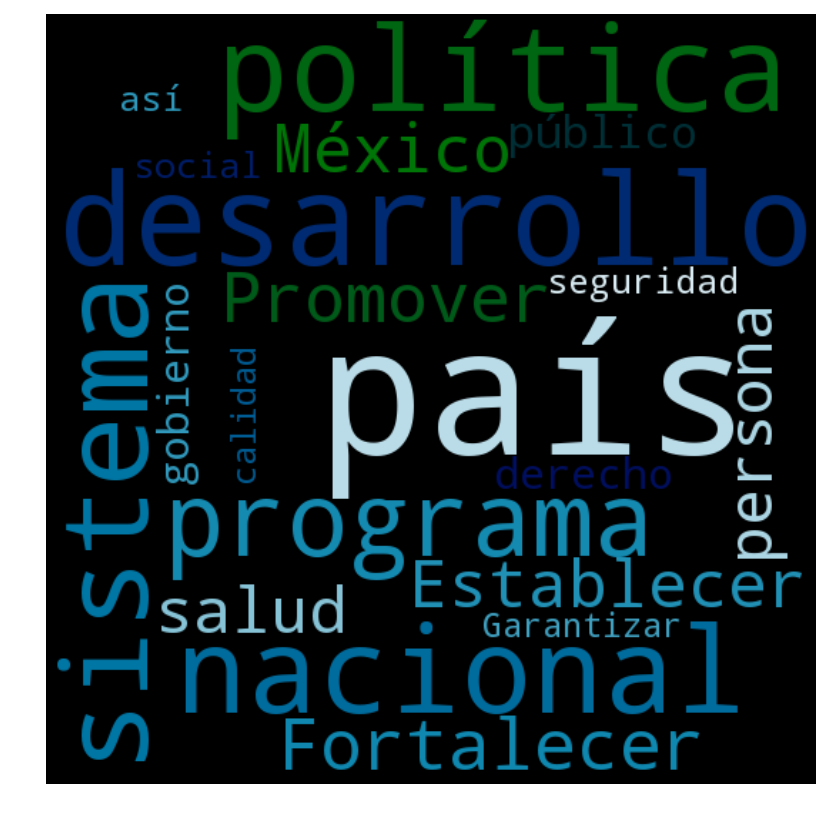

In [67]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 7.4 Dispersión de Palabras

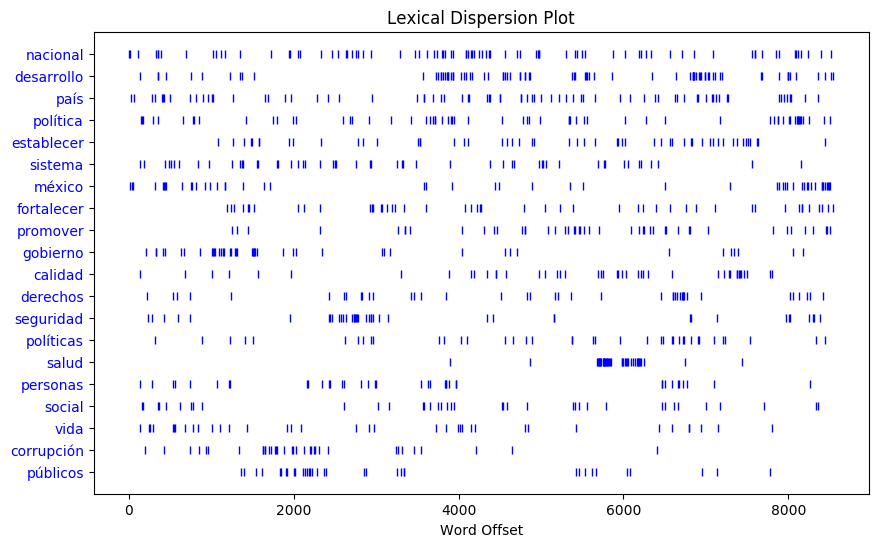

In [68]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 7.5 Bigrams y Trigrams

In [69]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'diabetes', u'mellitus'), (u'embajadas', u'consulados'), (u'usos', u'costumbres'), (u'niños', u'niñas'), (u'paquetería', u'mensajería'), (u'adultas', u'mayores'), (u'científico', u'tecnológico'), (u'matriz', u'energética'), (u'reducción', u'daños'), (u'valor', u'agregado')]


In [70]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'mediano', u'largo', u'plazo'), (u'normativa', u'federal', u'telecomunicaciones'), (u'áreas', u'naturales', u'protegidas'), (u'entidades', u'federativas', u'municipios'), (u'tecnologías', u'información', u'comunicación'), (u'organizaciones', u'delincuencia', u'organizada'), (u'personas', u'adultas', u'mayores'), (u'recuperación', u'espacios', u'públicos'), (u'fiscalía', u'general', u'república'), (u'transparencia', u'rendición', u'cuentas')]


#### 7.6 Palabras por Tipo Gramatical

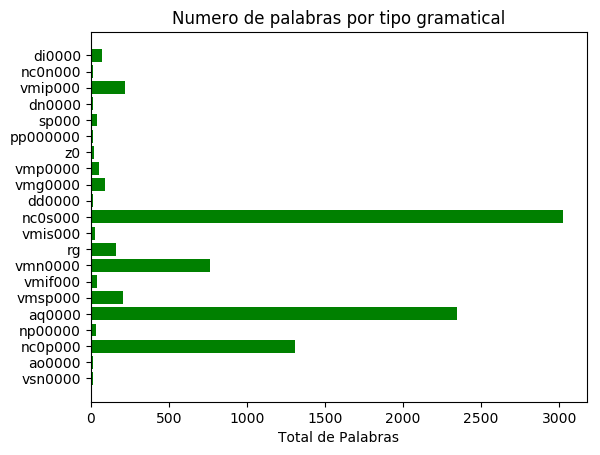

In [71]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 7.7 Palabras Claves

In [72]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 5 of 5 matches:
a política de estado que fomente la ciencia y la tecnología mexicanas orientánd
o social consolidar una política de ciencia y tecnología de largo plazo orienta
ar y reformar el marco normativo de ciencia tecnología e innovación incorporand
al de educación y la ley general de ciencia y tecnología implementar políticas 
líticas públicas y los programas de ciencia tecnología e innovación de las inst
-- tecnología --
Displaying 9 of 9 matches:
pacitación permanente y el uso de tecnología e inteligencia como elementos fun
stado que fomente la ciencia y la tecnología mexicanas orientándola con visión
solidar una política de ciencia y tecnología de largo plazo orientada a sector
mar el marco normativo de ciencia tecnología e innovación incorporando la inno
ión y la ley general de ciencia y tecnología implementar políticas públicas en
blicas y los programas de ciencia tecnología e innovación de las instituciones
reo permanente mediante el uso de tecnolo

<a id='PRD'></a>
### 8. PARTIDO de la REVOLUCION DEMOCRÁTICA

#### 8.1 Abrir Archivo

In [73]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaPRD.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 8.2 Preprocesamiento

In [74]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 8.3 Frecuencia de Palabras

In [75]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 5547
Palabras útiles totales en la plataforma: 2997
En total hay 1494 palabras únicas
Estas palabras se usan 2997 veces, aproximadamente 2.01 en promedio (suponiendo que se usaran igual)


In [76]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 987 palabras que se usan sólo una vez de las palabras únicas, un 66.06%


In [77]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'social', 31), (u'méxico', 30), (u'desarrollo', 28), (u'derechos', 26), (u'política', 22), (u'derecho', 22), (u'garantizar', 22), (u'gobierno', 18), (u'impulso', 18), (u'políticas', 16), (u'crecimiento', 15), (u'sistema', 15), (u'sociales', 15), (u'económico', 15), (u'nacional', 15), (u'mexicanos', 14), (u'trabajo', 14), (u'corrupción', 14), (u'millones', 14), (u'seguridad', 13)]


In [78]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 665.0


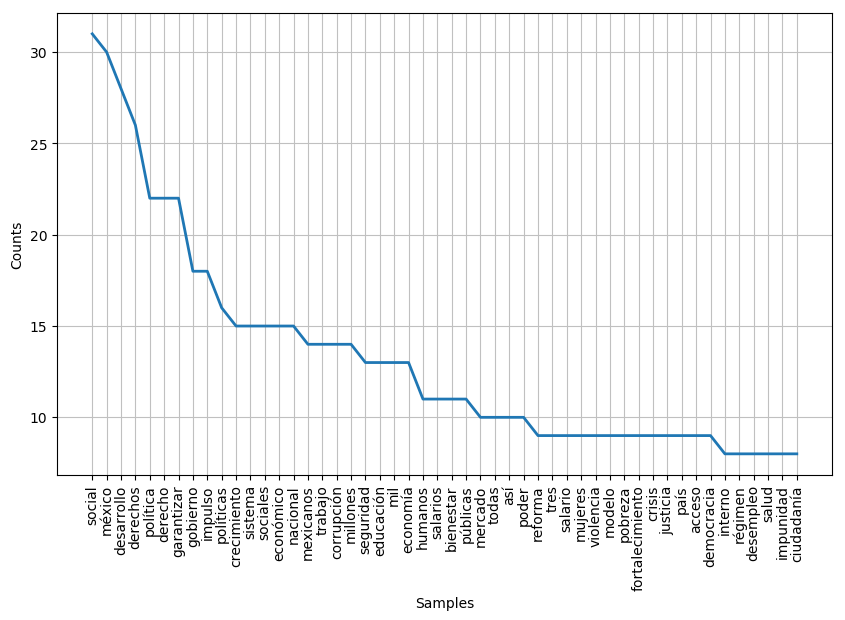

In [79]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [80]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 22.19% del total de las palabras.


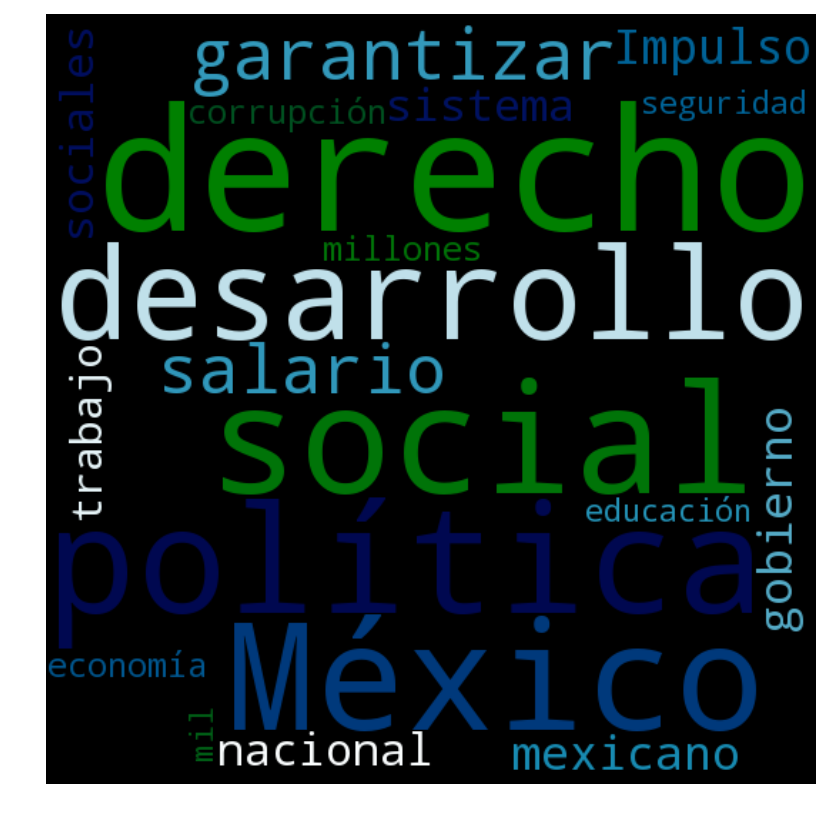

In [81]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 8.4 Dispersión de Palabras

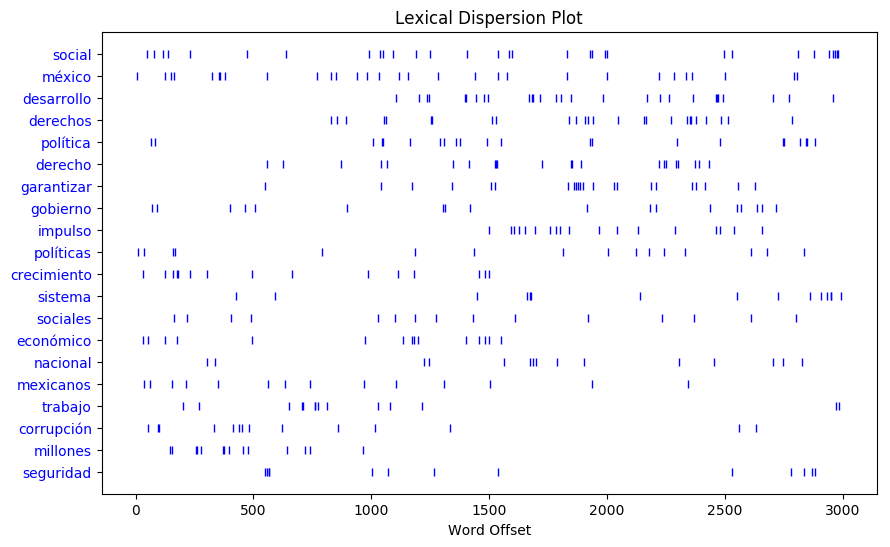

In [82]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 8.5 Bigrams y Trigrams

In [83]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'enrique', u'peña'), (u'peña', u'nieto'), (u'delincuencia', u'organizada'), (u'naciones', u'indias'), (u'poderes', u'tres'), (u'tres', u'poderes'), (u'tres', u'órdenes'), (u'cada', u'año'), (u'perspectiva', u'género'), (u'bajos', u'salarios')]


In [84]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'enrique', u'peña', u'nieto'), (u'instituciones', u'tres', u'poderes'), (u'tres', u'poderes', u'tres'), (u'tres', u'órdenes', u'gobierno'), (u'mil', u'millones', u'pesos')]


#### 8.6 Palabras por Tipo Gramatical

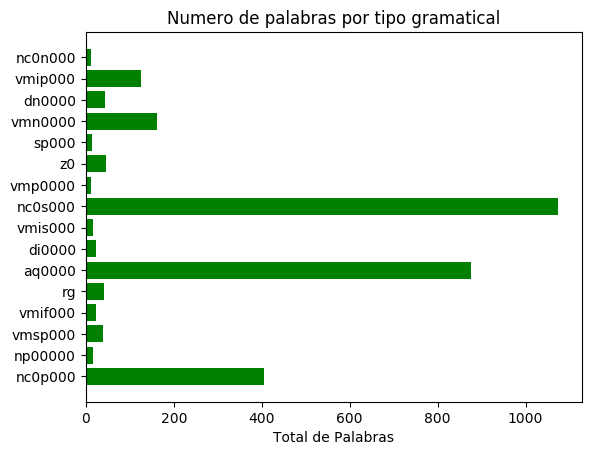

In [85]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 8.7 Palabras Claves

In [86]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 3 of 3 matches:
lógica convirtiendo la educación la ciencia y la tecnología en prioridades para
a y que permita el desarrollo de la ciencia en todas las áreas del conocimiento
 un programa para la difusión de la ciencia y sus aplicaciones entre la ciudada
-- tecnología --
Displaying 3 of 3 matches:
endo la educación la ciencia y la tecnología en prioridades para el desarrollo
ión extranjera a transferencia de tecnología e impulso a la empresa proveedora
 los avances de las ciencias y la tecnología y la solución de los problemas al
-- innovación --
Displaying 1 of 1 matches:
tividad basada en el desarrollo e innovación tecnológica convirtiendo la educa
-- tecnológica --
Displaying 3 of 3 matches:
ada en el desarrollo e innovación tecnológica convirtiendo la educación la cien
o objetivos una menor dependencia tecnológica del exterior impulsando la invest
ad sustentada en la productividad tecnológica soberanía del estado sobre recurs
-- investigación --
Displaying

<a id='PRI'></a>
### 9. PARTIDO REVOLUCIONARIO INSTITUCIONAL

#### 9.1 Abrir Archivo

In [87]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaPRI.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 9.2 Preprocesamiento

In [88]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 9.3 Frecuencia de Palabras

In [89]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 19113
Palabras útiles totales en la plataforma: 10079
En total hay 3041 palabras únicas
Estas palabras se usan 10079 veces, aproximadamente 3.31 en promedio (suponiendo que se usaran igual)


In [90]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 1657 palabras que se usan sólo una vez de las palabras únicas, un 54.49%


In [91]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'debemos', 111), (u'desarrollo', 102), (u'educación', 89), (u'país', 79), (u'méxico', 70), (u'así', 69), (u'social', 59), (u'manera', 55), (u'mexicanos', 51), (u'acceso', 51), (u'seguridad', 49), (u'jóvenes', 49), (u'promover', 48), (u'gobierno', 44), (u'salud', 40), (u'política', 38), (u'debe', 38), (u'ello', 38), (u'ser', 38), (u'sociedad', 38)]


In [92]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 2025.0


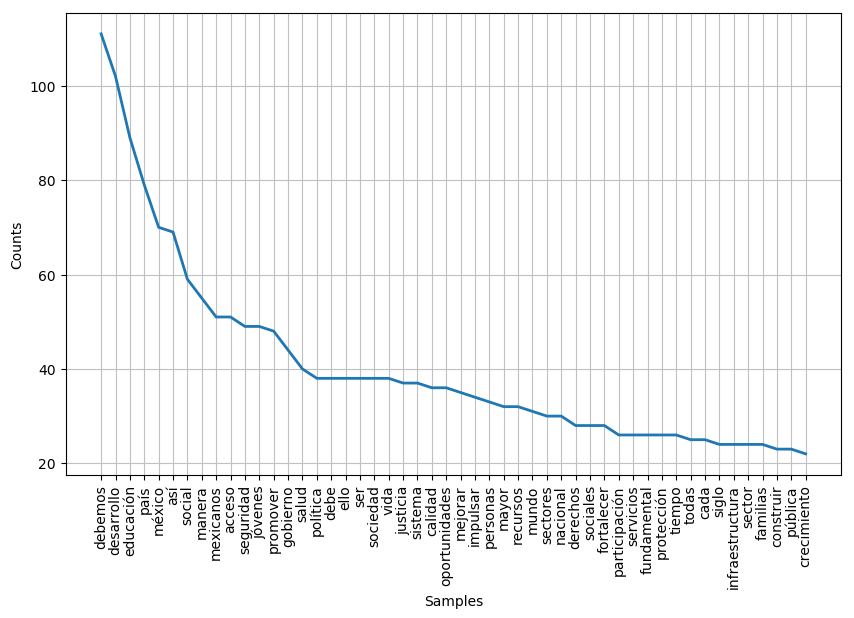

In [93]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [94]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 20.09% del total de las palabras.


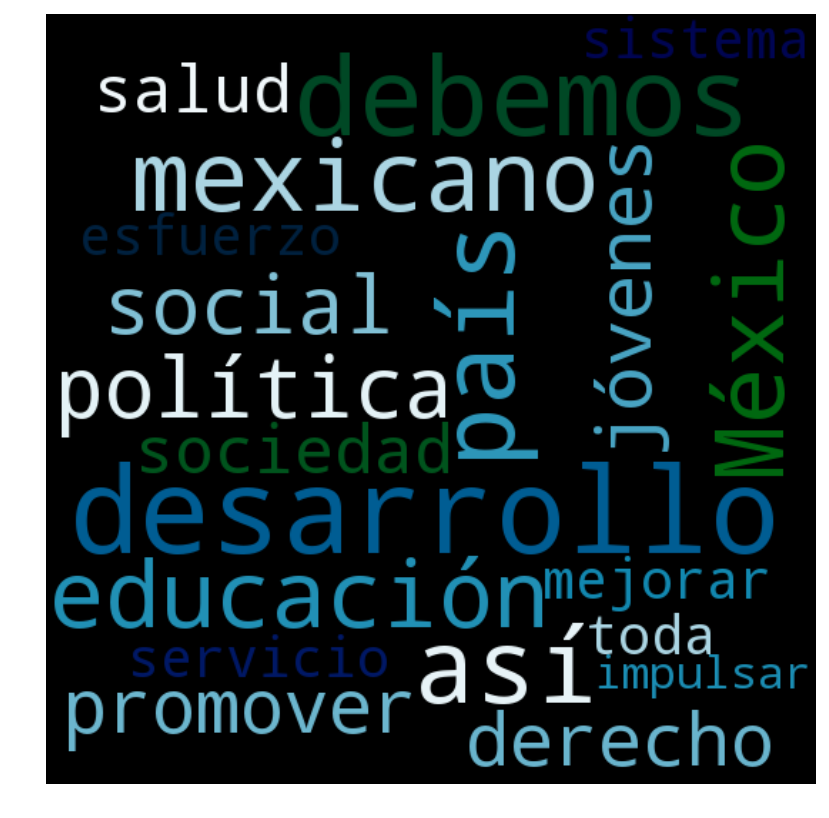

In [95]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 9.4 Dispersión de Palabras

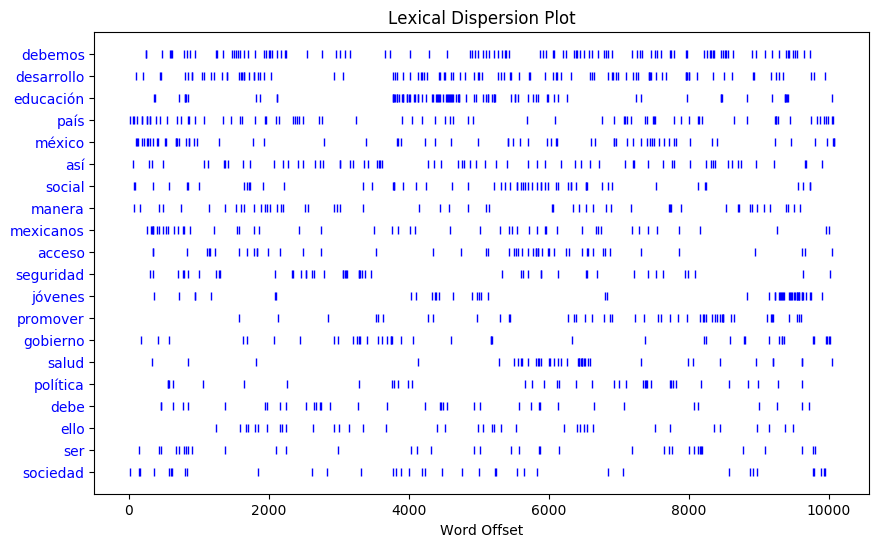

In [96]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 9.5 Bigrams y Trigrams

In [97]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'mamíferos', u'marinos'), (u'cargos', u'elección'), (u'elección', u'popular'), (u'lavado', u'dinero'), (u'estabilidad', u'macroeconómica'), (u'simplificación', u'trámites'), (u'rendición', u'cuentas'), (u'habilidades', u'digitales'), (u'día', u'mañana'), (u'partido', u'revolucionario')]


In [98]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'cargos', u'elección', u'popular'), (u'partido', u'revolucionario', u'institucional'), (u'áreas', u'naturales', u'protegidas'), (u'transparencia', u'rendición', u'cuentas'), (u'economía', u'abierta', u'dinámica'), (u'personas', u'adultas', u'mayores'), (u'escuelas', u'tiempo', u'completo'), (u'integral', u'sustentable', u'agua'), (u'conservación', u'recursos', u'naturales'), (u'cuidado', u'medio', u'ambiente')]


#### 9.6 Palabras por Tipo Gramatical

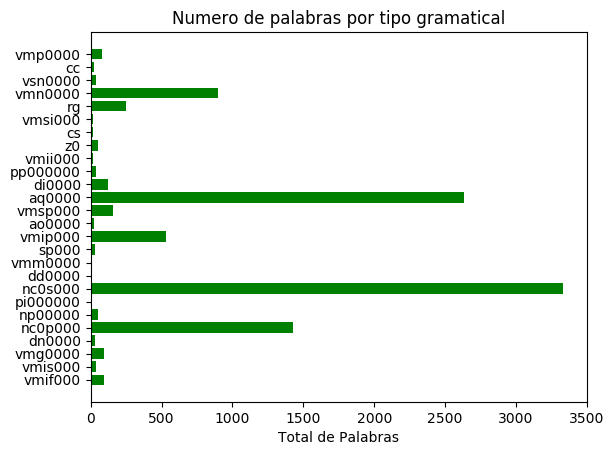

In [99]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
palabrasPorTipoGramatical(palabrasRelevantes)

#### 9.7 Palabras Claves

In [100]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 7 of 7 matches:
educación de calidad con equidad la ciencia la innovación y el desarrollo tecno
o país al hacerlo fortaleceremos la ciencia mexicana para generar más talento m
 entero a partir de la educación la ciencia la cultura y el deporte podremos re
r el gusto por las matemáticas y la ciencia entre niñas y jóvenes empleando div
r fortalecer el sistema nacional de ciencia tecnología e innovación a partir de
ectores público privado y social en ciencia tecnología e innovación para supera
eración en particular en materia de ciencia y tecnología educación y cultura de
-- tecnología --
Displaying 11 of 11 matches:
ís no es ajeno a estos cambios la tecnología avanza a una velocidad inédita qu
era específica industrias de alta tecnología tienen un potencial de crecimient
l de la misma manera el uso de la tecnología nos puede ayudar para generar mec
s oportunidades que nos brinda la tecnología para responder a las necesidades 
da vez más desafiante en donde la tec

<a id='PT'></a>
### 10. PARTIDO del TRABAJO

#### 10.1 Abrir Archivo

In [129]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaPT.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 10.2 Preprocesamiento

In [130]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 10.3 Frecuencia de Palabras

In [131]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 19971
Palabras útiles totales en la plataforma: 10610
En total hay 3575 palabras únicas
Estas palabras se usan 10610 veces, aproximadamente 2.97 en promedio (suponiendo que se usaran igual)


In [132]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 2032 palabras que se usan sólo una vez de las palabras únicas, un 56.84%


In [133]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'méxico', 90), (u'país', 77), (u'desarrollo', 73), (u'social', 71), (u'política', 69), (u'nacional', 67), (u'trabajo', 61), (u'partido', 55), (u'políticas', 48), (u'población', 48), (u'ciento', 48), (u'debe', 47), (u'crecimiento', 47), (u'gobierno', 46), (u'económica', 43), (u'economía', 41), (u'educación', 40), (u'años', 39), (u'“', 39), (u'”', 39)]


In [134]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 1892.0


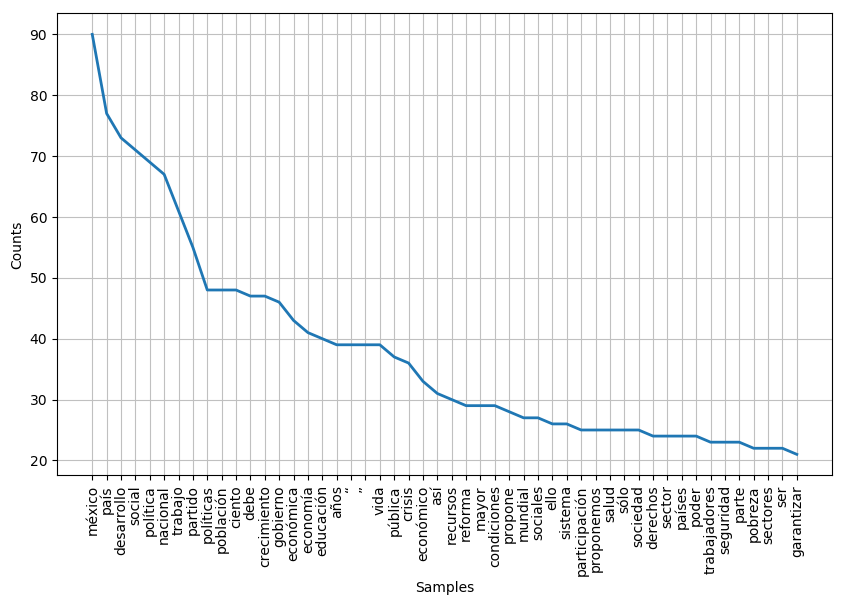

In [135]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [136]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 17.83% del total de las palabras.


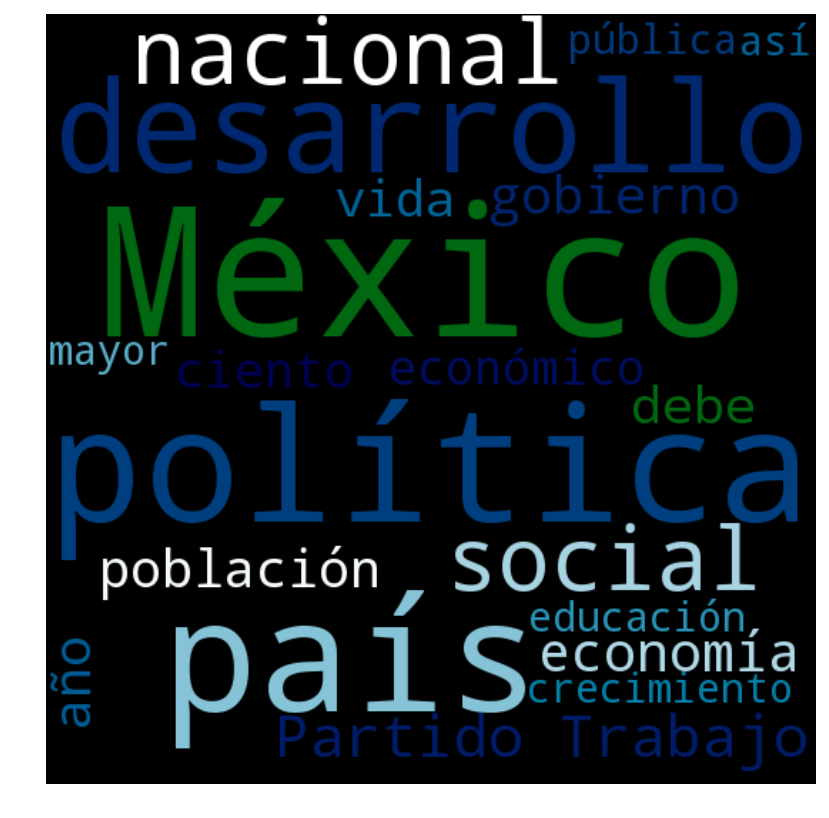

In [109]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 10.4 Dispersión de Palabras

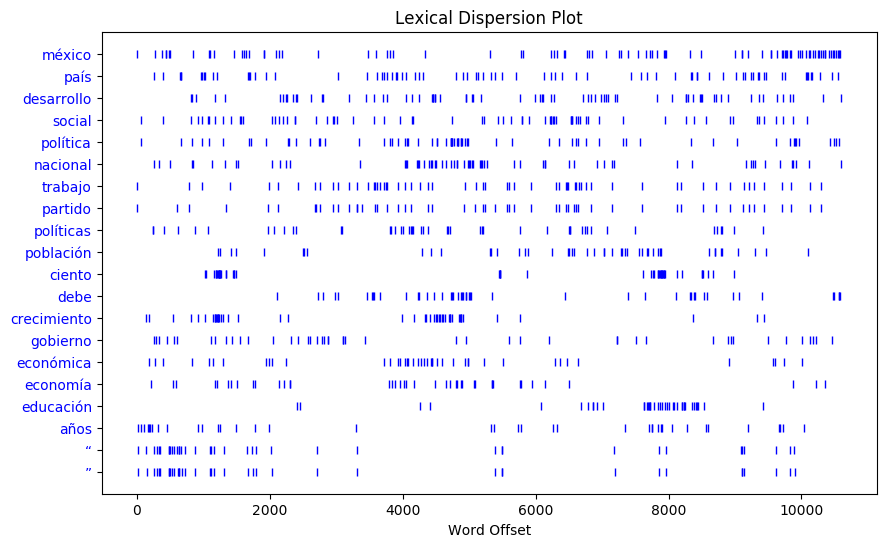

In [110]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 10.5 Bigrams y Trigrams

In [111]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'corea', u'sur'), (u'bien', u'remunerado'), (u'pri', u'pan'), (u'sustitución', u'importaciones'), (u'multiplicadores', u'internos'), (u'congreso', u'unión'), (u'crimen', u'organizado'), (u'financieras', u'macroeconómicas'), (u'diciembre', u'2012'), (u'latina', u'caribe')]


In [112]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'productivo', u'bien', u'remunerado'), (u'productivas', u'financieras', u'macroeconómicas'), (u'000', u'millones', u'dólares'), (u'narcotráfico', u'crimen', u'organizado'), (u'producto', u'interno', u'bruto'), (u'tods', u'ls', u'mexicans'), (u'américa', u'latina', u'caribe'), (u'efectos', u'multiplicadores', u'internos'), (u'corto', u'mediano', u'largo'), (u'capital', u'financiero', u'especulativo')]


#### 10.6 Palabras por Tipo Gramatical

In [138]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
#palabrasPorTipoGramatical(palabrasRelevantes)

#### 10.7 Palabras Claves

In [114]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 7 of 7 matches:
aica gratuita científica y creativa ciencia y tecnología un país que no desarro
l que ha jugado el desarrollo de la ciencia y la tecnología y la aplicación de 
valente del 04 por ciento del pib a ciencia y tecnología mientras las naciones 
mos nacionales e internacionales de ciencia y tecnología todo ello para garanti
ción de mayores recursos públicos a ciencia y tecnología hasta alcanzar el nive
ciones exteriores economía ambiente ciencia y tecnología y derecho internaciona
 el rezago de méxico en términos de ciencia y tecnología derecho internacional 
-- tecnología --
Displaying 9 of 9 matches:
 infraestructura incorporación de tecnología servicios básicos educación y sal
a científica y creativa ciencia y tecnología un país que no desarrolla sus sis
 el desarrollo de la ciencia y la tecnología y la aplicación de éstas en sus s
04 por ciento del pib a ciencia y tecnología mientras las naciones desarrollad
es e internacionales de ciencia y tecno

<a id='PVEM'></a>
### 11. PARTIDO VERDE ECOLOGÍSTA DE MÉXICO

#### 11.1 Abrir Archivo

In [115]:
#abrimos el archivo que contien la plataforma
text = abrirTexto('PlataformaPVEM.txt')

#Por si se quiere abrir un archivo
#print text.encode('utf-8')

#### 11.2 Preprocesamiento

In [116]:
#1)preparemos todo para crear los tokens
palabras = tokenizar(eliminacionSignos(todoMinusculas(text)))

#Remover stopwords o en español palabras "vacias"
palabrasRelevantes = palabrasUtiles(palabras)

 ##print text.encode('utf-8')

#### 11.3 Frecuencia de Palabras

In [117]:
fdist = FreqDist(palabrasRelevantes)

#Total de palabras únicas
palabrasUnicas = len(fdist)

#Total de palabras usadas
palabrasUsadas = len(palabrasRelevantes)

#Promedio de palabras únicas usadas durante todo el texto
freq = float(palabrasUsadas)/float(palabrasUnicas)

print "Palabras totales en la plataforma: " + str(len(palabras))
totalPalabras = len(palabrasRelevantes)
print "Palabras útiles totales en la plataforma: " + str(totalPalabras)
print('En total hay ' + str(palabrasUnicas) + ' palabras únicas') 
print('Estas palabras se usan ' + str(palabrasUsadas) + ' veces, aproximadamente ' +str(round(freq, 2)) + ' en promedio (suponiendo que se usaran igual)')

Palabras totales en la plataforma: 50240
Palabras útiles totales en la plataforma: 26934
En total hay 6604 palabras únicas
Estas palabras se usan 26934 veces, aproximadamente 4.08 en promedio (suponiendo que se usaran igual)


In [118]:
#palabras que se usan una vez
unaVez = len(fdist.hapaxes())
porcentaje = round((float(unaVez) / float(palabrasUnicas)) * 100., 2)

print('Hay ' + str(unaVez) + ' palabras que se usan sólo una vez de las palabras únicas, un ' +  str(porcentaje) + '%')

Hay 3496 palabras que se usan sólo una vez de las palabras únicas, un 52.94%


In [119]:
#Las 20 palabras mas usadas
top20 = fdist.most_common(20)
print ('Top de palabras mas usadas con su frecuencia: ')
print repr(top20).decode('unicode-escape')

Top de palabras mas usadas con su frecuencia: 
[(u'méxico', 201), (u'salud', 144), (u'ley', 126), (u'país', 114), (u'nacional', 113), (u'personas', 107), (u'social', 101), (u'desarrollo', 98), (u'gobierno', 95), (u'federal', 95), (u'así', 92), (u'millones', 91), (u'años', 87), (u'trabajo', 84), (u'cada', 83), (u'alimentos', 83), (u'artículo', 81), (u'animales', 80), (u'mil', 80), (u'pesos', 77)]


In [120]:
total50palabras = 0.
top50 = fdist.most_common(50)
for palabra in top50:
    total50palabras += palabra[1]
print 'Suma acumuluda del total de las 50 palabras mas usadas: ' + str(total50palabras)

Suma acumuluda del total de las 50 palabras mas usadas: 3891.0


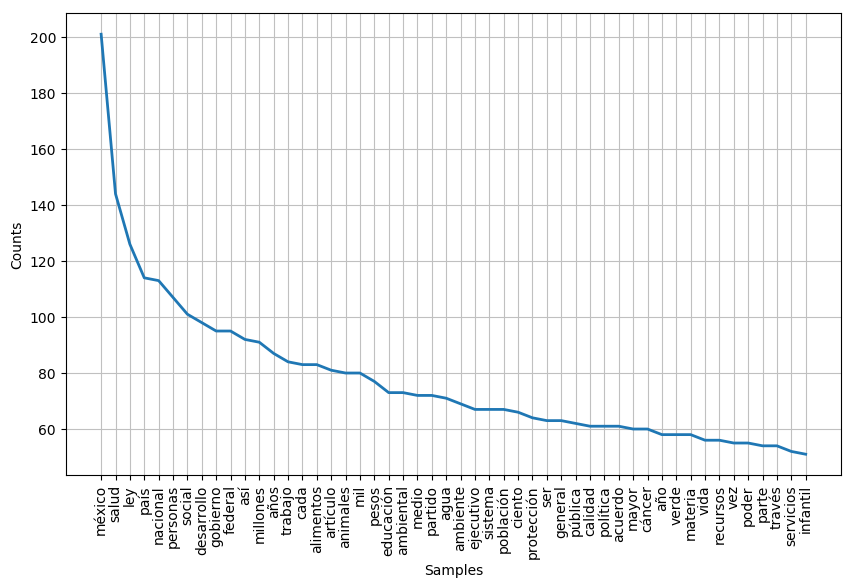

In [121]:
plt.figure(figsize=(10,6))
fdist.plot(50, cumulative=False)

In [122]:
print('El top de las 50 palabras cubre el ' + str(round((total50palabras/len(palabrasRelevantes))*100, 2)) + '% del total de las palabras.')

El top de las 50 palabras cubre el 14.45% del total de las palabras.


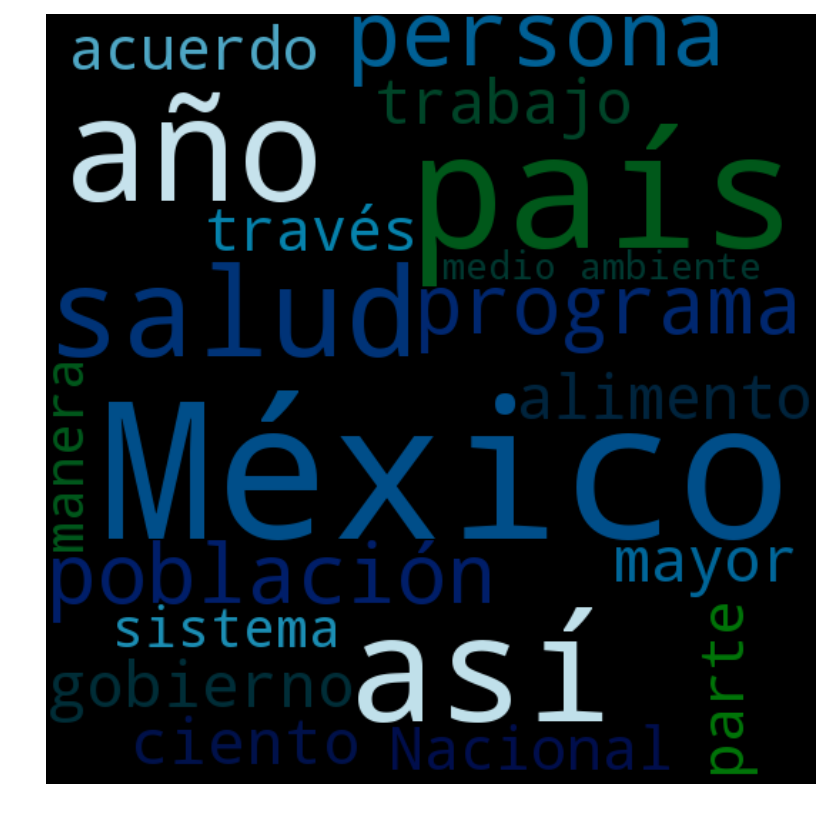

In [123]:
# Creamos una nube de palabras para visualizar las más usadas
crearNube(palabrasRelevantes)

#### 11.4 Dispersión de Palabras

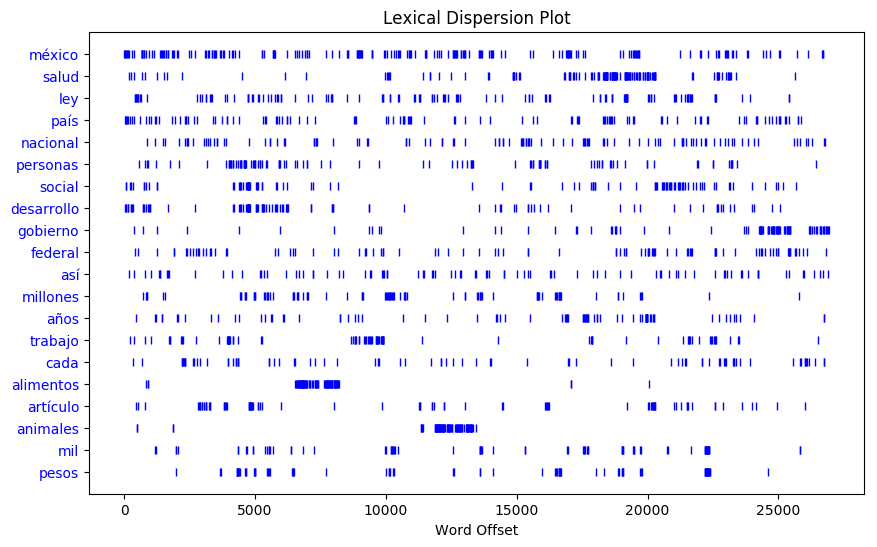

In [124]:
#3) Dispersión de las palabras dentro de todo el texto
dispersionPalabras(palabrasRelevantes)

#### 11.5 Bigrams y Trigrams

In [125]:
# Colocación, las palabras que se encuentran juntas mas veces
bigram(palabrasRelevantes)

Top de 2 palabras que aparecen juntas mas veces: 
[(u'cérvico', u'uterino'), (u'diámetro', u'aerodinámico'), (u'entrada', u'salida'), (u'ganaderas', u'silvícolas'), (u'paneles', u'solares'), (u'reino', u'unido'), (u'siglo', u'xxi'), (u'silvícolas', u'pesqueras'), (u'comedores', u'comunitarios'), (u'permanentes', u'temporales')]


In [126]:
trigram(palabrasRelevantes)

Top de 3 palabras que aparecen juntas mas veces: 
[(u'ganaderas', u'silvícolas', u'pesqueras'), (u'permanentes', u'temporales', u'ambulantes'), (u'agrícolas', u'ganaderas', u'silvícolas'), (u'médico', u'siglo', u'xxi'), (u'exclusivo', u'ejército', u'armada'), (u'puestos', u'permanentes', u'temporales'), (u'tianguis', u'puestos', u'semifijos'), (u'centrales', u'abasto', u'mercados'), (u'prueba', u'piloto', u'rigurosa'), (u'prisión', u'preventiva', u'oficiosa')]


#### 11.6 Palabras por Tipo Gramatical

In [127]:
#Postagger-Palabras mas usadas por grupo gramatical 
#referencia https://nlp.stanford.edu/software/spanish-faq.shtml#tagset
#palabrasPorTipoGramatical(palabrasRelevantes)

#### 11.7 Palabras Claves

In [128]:
# Búsqueda de palabras claves dentro de la plataforma
palabrasclaves = [u'ciencia', u'tecnología',u'innovación',u'tecnológica',u'investigación',u'academia',
                  u'economía',u'internet',u'inteligencia',u'artificial',u'tecnologías de la información',
                  u'software',u'industria', u'manufactura',u'arte',u'cultura',u'deporte',u'ecología']
textList = Text(palabras)
palabrasEnPlataforma(palabrasclaves)   

-- ciencia --
Displaying 1 of 1 matches:
den contagiarte consejo nacional de ciencia y tecnología conacyt méxico 2017 di
-- tecnología --
Displaying 3 of 3 matches:
edido por la empresa holandesa de tecnología tomtom la ciudad de méxico ocupa 
rte consejo nacional de ciencia y tecnología conacyt méxico 2017 dirigidos a e
as de mayor complejidad y elevada tecnología el minsap desarrolla una estrateg
-- innovación --
Displaying 3 of 3 matches:
a desvinculadas así como una baja innovación y emprendedurismo economía con re
d para fomentar el auto empleo la innovación y el emprendimiento los apoyos a 
ve que generan prosperidad empleo innovación y son un potente motor del desarr
-- tecnológica --
Displaying 1 of 1 matches:
 el centro nacional de excelencia tecnológica en salud cenetec se argumenta que
-- investigación --
Displaying 3 of 3 matches:
ntran separadas las funciones de investigación acusación y resolución del hecho
enunciados o no derivaron en una investigación por parte de la au

<a id='conclusiones'></a>
### 12. CONCLUSIONES

El presente documento, analiza el texto contenido de cada una de las plataformas presentadas por cada partido político para el año 2018. En esta sección se resumen los hallazgos más relevantes, los cuales no intentan generar ningún tipo de tendencia política y solo se limitan a los resultados cuantitativos obtenidos. Basado en estos, se busca que el lector obtenga más información y defina con mayor claridad la plataforma de su agrado. Al mismo tiempo, creo que este análisis puede servir como un punto introductorio, para después, leer a fondo cada plataforma.

Esta sección está dividida en 4 partes. Primero, se muestra una visión general del tamaño con respecto al número de palabras de cada plataforma. Segundo, se listan las palabras "relevantes" más usadas por cada partido político. Las palabras "relevantes" se refiere a aquellas que no se encuentran dentro del listado de stopwords("spanish") que son las conjunciones, pronombres, preposiciones, entre otras. Tercero son las palabras en grupos de dos y tres que aparecen más frecuentemente juntas. Cuarto, el número de menciones de las palabras seleccionadas por el autor, de las cuales tenía mayor interés que los partidos políticos abordaran.

| Partido | Palabras Totales   | Palabras Útiles   | Palabras Únicas   | Palabra usadas una vez   | % Palabras usadas una vez vs Palabras Únicas|
|------|------|------|------|------|------| 
| ES | 7518| 4026|1775| 1068| 60.17%|
| MC |19684| 10681| 2961| 1582|53.43%|
| MORENA |7610| 4023| 2019| 1336 |66.17%|
| NA |39716|21237|4507|2185|48.48%|
| PAN |16145|8557|2872|1654| 57.59%|
| PRD |5547| 2997|1494|987| 66.06|
| PRI |19113| 10079|3041|1657|54.49%|
| PT  |19971| 10610|3575|2032|56.84%|
| PVEM|50240| 26934|6604|3496| 52.94%|

<p><center><b>Tabla 1.</b> Número de palabras totales, útiles, únicas y usadas una vez por cada plataforma política. </center></p>

La tabla 1 presenta el número total de las palabras que se utilizaron en cada documento. En general, se observa que el tamaño de cada plataforma es muy disperso, por un lado tenemos al PRD con 5547 palabras totales mientras que el PVEM tiene aproxiamadamente 10 veces más con 50,240 palabras. Por total de palabras podemos agruparlas en 3 dependiendo del total de palabras. Las plataformas con más palabras que son PVEM con 50,240 palabras, seguido de NA con 39,976. Después las plataformas del PT, MC, PRI, PAN, con 19,971, 19,684, 19,113, y 16,145 respectivamente. Y al final las plataformas más breves que son de MORENA con 7,610, ES 7,518, y PRD con 5,547. 

Al filtrar eliminando las palabras comunes, todas las plataformas redujeron su tamaño en promedio en un 50%. 

La plataforma que utiliza más vocabulario es el PVEM con 6,604 palabras únicas, que se puede entener al ser el texto mas largo. Tendencia similar con todas la plataformas dependiendo de su tamaño inicial. Por ejemplo, el PRD utiliza sólo 1,494 palabras, siendo la plataforma con menos vocabulario. 

Curiosamente todas las plataformas tienen un porcentaje similar de palabras que se utilizan sólo una vez con respecto al total de palabras únicas. El porcentaje va de 52.94% del PVEM siendo el menor, y MORENA con 66.17% teniendo el mas alto.


| Partido | Palabra 1   | Palabra 2   | Palabra 3   | Palabra 4   | Palabra 5   |
|------|------|------|------|------|------| 
| ES | desarrollo - 47| social - 34 | mujeres/recursos - 24 | programas - 23 | méxico - 21 | 
| MC |desarrollo - 156| promover -98| personas - 82| programas - 81| impulsar - 77| 
| MORENA |méxico - 48| país - 32| ciento/millones - 27 | corrupción - 26 | nacional - 23|
| NA |promover - 275|desarrollo - 211|programas - 178|impulsar - 133|méxico - 128|
| PAN |nacional - 85| desarrollo - 82|país - 75|política - 64|establecer - 54| 
| PRD |social - 31| méxico - 30|desarrollo - 28|derechos - 26|política - 22|
| PRI |debemos - 111| desarrollo - 102|educación - 89|país - 79|méxico - 70|
| PT  | méxico - 90| país - 77|desarrollo - 73|social - 71|política - 69|
| PVEM|méxico - 201| salud - 144|ley - 126|país - 114|nacional - 113| 

<p><center><b>Tabla 2.</b> Listado de palabras más usadas dentro de cada plataforma con el número de veces que aparece. </center></p>

La tabla 2, presenta los términos mas comúnes. Como se observa, existe un común denominador de palabras. Por ejemplo, la palabra "desarrollo" que aparece en el listado de todos los partidos excepto en MORENA y el PVEM. La palabra "México" o "país" que se refiere a lo mismo, esta en cada uno de los partidos, menos en MC. La expresión "promover" dentro de NA es la de mayor número de repeticiones con 275, seguido de "desarrollo" en el mismo texto con 211.

Cada partido excepto por NA y el PT contaron con palabras únicas. Esto quiere decir, que dentro de su top 5 ningún otro partido la utilizó dentro de sus otros 5 términos mas comunes. Esto podría darnos una idea del enfoque especial de la plataforma, puede que sea muy vago basarlo sólo en una palabra, o inclusive erróneo, pero se encontraron algunas coincidencias con lo que los actores políticos de dichos partidos han hablado cotidianamente. Las palabras son las siguientes: <br>
ES - mujeres, recursos <br>
MC - personas <br>
MORENA - ciento, millones, corrupción <br>
PAN - establecer <br>
PRD - derechos <br>
PRI - debemos, educación <br>
PVEM - salud, ley <br>

| Partido | Grupo 1   | Grupo 2   | Grupo 3   | Grupo 4   | Grupo 5   |
|------|------|------|------|------|------| 
| ES | combustibles-fósiles| efecto-invernadero|estaciones-automáticas|gases-efecto|hábito-lectura| 
| MC |contamina-paga| apartidista-capaz| autónoma-apartidista|capaz-independiente|causas-estructurales| 
| MORENA |estatal-municipal| llevar-cabo|viabilidad-financiera|world-economic|macro-legal|
| NA |siglo-xxi|últimas-décadas|latina-caribe|asociaciones-públicoprivadas|bósques-selvas|
| PAN |diabetes-mellitus|embajadas-consulados|usos-costumbres|niños-niñas|paquetería-mensajería| 
| PRD |enrique-peña|peña-nieto|delincuencia-organizada|naciones-unidas|poderes-tres|
| PRI |mamíferos-marinos|cargos-elección|elección-popular|lavado-dinero|estabilidad-macroeconómica|
| PT  | corea-sur|bien-remunerado|pri-pan|sustitución-importaciones|multiplicadores-internos|
| PVEM|cérvico-uterino|diámetro-aerodinámico|entrada-salida|ganaderas-silvícolas|paneles-solares| 

<p><center><b>Tabla 3.</b> Grupo de dos palabras más usadas dentro de cada plataforma política. </center></p>

Dentro de la tabla 3, se observan los términos que aparecen juntos al menos 3 veces. Contrario a la tabla 2, aqui aparecen términos que uno no esperaría dentro de un partido político. Por ejemplo, el tema del calentamiento global de ES con los primeros 4 grupos, de MC con el primer grupo, o de NA con "bósques-selvas". Temas de salud por el PAN con "diabetes-mellitus", o "cérvico-uterino" del PVEM. Otros grupos interesantes como el de "enrique-peña" o "peña-nieto" dentro del PRD, o "pri-pan" del PT.
La mayoría del contexto de cada uno de los grupos se puede entender, sin embargo, existen unos que invitan a buscarlos dentro de la plataforma. Como es el caso de "paquetería-mensajería" del PAN, el cual se refiere a cambios en la normativa federal en telecomunicaciones para regular los servicios de "paquetería y mensajería" y el uso de drones y robots. O la de "mamíferos-marinos" del PRI en la que se habla sobre la protección de dichos animales. 

| Partido | Grupo 1   | Grupo 2   | Grupo 3   | Grupo 4   | Grupo 5   |
|------|------|------|------|------|------| 
| ES |gases-efecto-invernadero|leyes-electorales-estatales|tres-órdenes-gobierno|educación-perinatal-hombres| perinatal-hombres-mujeres| 
| MC |apartidista-capaz-independiente|autónoma-apartidista-capaz|desempeñar-adecuadamente-funciones|efectivos-desempeñar-adecuadamente|controles-efectivos-desempeñar| 
| MORENA |pib-per-cápita|nuevo-gobierno-democrático|méxico-bueno-contar|proyecto-nación-20182024|mil-millones-pesos|
| NA |micro-pequeña-medianas|américa-latina-caribe|favorecidos-voto-popular|mediano-largo-plazo|intérpretes-lengua-señas|
| PAN |mediano-largo-plazo|normativa-federal-telecomunicaciones|áreas-naturales-protegidas|entidades-federativas-municipios|tecnologías-información-comunicación| 
| PRD |enrique-peña-nieto|instituciones-tres-poderes|tres-poderes-tres|tres-órdenes-gobierno|mil-millones-pesos|
| PRI |cargos-elección-popular|partido-revolucionario-institucional|áreas-naturales-protegidas|transparencia-rendición-cuentas|economía-abierta-dinámica|
| PT  | productivo-bien-remunerado|productivas-financieras-macroeconómicas|000-millones-dólares|naracotráfico-crimen-organizado|producto-interno-bruto|
| PVEM|ganaderas-silvícolas-pesqueras|permanentes-temporales-ambulantes|agrícolas-ganaderas-silvícolas|médico-siglo-xxi|exclusivo-ejército-armada| 

<p><center><b>Tabla 4.</b> Grupo de tres palabras más usadas dentro de cada plataforma política. </center></p>

La tabla 4, similar a la anterior, agrupa 3 palabras con al menos 3 apariciones. Existen algunos cambios de palabras agrupadas con respecto a la tabla anterior. Dentro del partido ES se nota un cambio en el grupo 4 y 5 que tiene que ver con la educación perinatal de hombres y mujeres. MC no sufre muchos cambios y solo agrega mayor contexto a los temas de una fiscalía autónoma apartidista y capaz. En MORENA, el grupo 3 "méxico-bueno-contar" resulta interesante, ya que se refiere al enunciado "...en México no hay nada bueno que contar...". El grupo "intérpretes-lengua-señas" en NA se refiere al apoyo a los grupos vulnerables. Con respecto al PAN, se encuentra que tanto el grupo 2 "normativa-federal-telecomunicaciones", y el grupo 5 "tecnologías-información-comunicación" tienen una relación directa con el grupo 5 de la tabla 3 "paquetería-mensajería" que se pudiera pensar que no son términos tan comunes en el lenguaje político. Tanto MORENA como el PRD comparte una misma agrupación que es la de "mil-millones-pesos." Solo existe otra coincidencia que es entre ES y PRD con "tres-órdenes-gobierno". El PRI es el único partido que aparece mencionado así mismo como se observa en su grupo 2. 


|Palabra|ES|MC|MORENA|NA|PAN|PRD|PRI|PT|PVEM|Total|
|------|------|------|------|------|------|------|------|------|------|------|
|ciencia|0|3|0|8 |5 |3 |7 |7 |1|34|
|tecnología|2|6|1|23|9 |3 |11|9 |3|67|
|innovación|1|9|0|20|9 |1 |13|0 |3|56|
|tecnológica|1|5|0|15|4 |3 |3 |3 |1|35|
|investigación|2|14|0|40|15|4 |10|5 |3|93|
|academia|0|1|0|1 |0 |0 |0 |0 |0|2|
|economía|2|17|7|28|18|13|22|41|21|169|
|internet|0|4|0|14|3 |2 |5 |2 |0|30|
|inteligencia|0|6|0|4 |10|0 |5 |0 |1|26|
|artificial|0|0|0|0 |0 |0 |0 |0 |0|0|
|tecnologías de la información|0|0|0|0 |0 |0 |0 |0 |0|0|
|software|0|0|0|0 |1 |0 |0 |0 |0|1|
|industria|1|3|0|13|3 |1 |2 |1 |14|38|
|manufactura|0|0|0|0 |0 |0 |0 |0 |0|0|
|arte|3|9|3|6 |0 |1 |1 |1 |1|25|
|cultura|4|20|2|53|20|7 |17|7 |10|140|
|deporte|0|8|8|11|1 |0 |4 |2 |1|35|
|ecología|0|0|0|0 |0 |0 |0 |1 |1|2|
|------|------|------|------|------|------|------|------|------|------|------|
|TOTAL|16|105|21|236|98|38|100|79|60|753|

<p><center><b>Tabla 5.</b> Número de menciones de cada palabra por cada partido político dentro del texto. </center></p>


Por último, la tabla 5 nos muestra el número de menciones que tiene cada una de las palabras seleccionadas. En general, el término mas citado fue el de "economía", seguido de "cultura", y depués "investigación". Si se consulta el contexto de cada una de las palabras, a veces, no coinciden con lo primero que uno pensaría. Esto sucede mucho con la palabra "cultura", la cual se agregó para saber que tanto los partidos abordan el tema de las artes o formación artística. Desgraciadamente, la palabra cultura se utilizó mas en el entorno de "cultura cívica", "cultura laboral", "cultura social", por mencionar algunos, no en el entorno esperado.

Como se advierte, el partido que aportó más fue el NA, sus palabras más comunes fueron "cultura" e "investigación" en total tuvo 236, después está MC con 105, muy cerca tanto el PRI como el PAN con 100 y 98, respectivamente. Aún y cuando el PVEM es el texto más largo, no se encuentra de las plataformas con más coincidencias, solo se encuentra apenas por arriba de las 3 plataformas más pequeñas que son ES, MORENA y el PRD.

Estos resultados hacen pensar que si bien, todos los partidos aborda demasiado el tema de "economía", no se explica a detalle como hacerla crecer. Temas como ciencia, tecnología, innovación, investigación, industria y manufactura, tienen poco o nada de menciones. Fue una sorpresa que ningún partido hace referencia a la "manufactura", una de las principales actividades económicas del país, aunque bien podría abordarse con otro término, al igual que la "inteligencia artificial" o "ecología" que solo tiene 2 menciones.

<a id='PVEM'></a>
### 13. TRABAJO FUTURO

Se considera que este archivo puede servir de base para otro tipo de análisis como el semantico o lexico. Se podría ondar más a fondo entre la relación de los partidos políticos. Hacer el mismo estudio pero basado en las alianzas y observar sus similitudes y diferencia. Se pudiera agregar la probabilidad de las palabras con los n-grams y generar discursos o plataformas basadas en ello.